In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

In [ ]:
# ------------------- Download Dataset from Kaggle -------------------
# Fetch the latest version of the dataset
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

# Display the path where dataset files are downloaded
print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 440kB/s]

Extracting files...
Path to dataset files: /Users/reshmam/.cache/kagglehub/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/versions/1


In [ ]:
# Load the dataset into a Pandas DataFrame and display first few rows
df = pd.read_csv(f"{path}/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# ------------------- Dataset Overview -------------------
df.info()  # Get dataset information (column names, data types, missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()  # Summary statistics of numerical columns

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# ------------------- Correlation Analysis -------------------
# Check correlation between 'Age' and 'Spending Score (1-100)'
df['Age'].corr(df['Spending Score (1-100)'])
# df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])

-0.3272268460390901

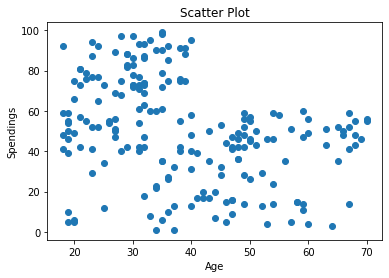

In [ ]:
# Scatter plot of Age vs Spending Score
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.title('Scatter Plot')
plt.xlabel('Age')
plt.ylabel('Spendings')
plt.show()

In [ ]:
# ------------------- Age Group Segmentation -------------------
# Define age groups for segmentation
bins = [18, 30, 40, 50, 60] 
labels = ['18-30', '30-40', '40-50', '50-60']

# Create a new column 'Age Group' based on the defined bins
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Display first few rows with the new Age Group column
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Age Group
0,1,Male,19,15,39,18-30
1,2,Male,21,15,81,18-30
2,3,Female,20,16,6,18-30
3,4,Female,23,16,77,18-30
4,5,Female,31,17,40,30-40


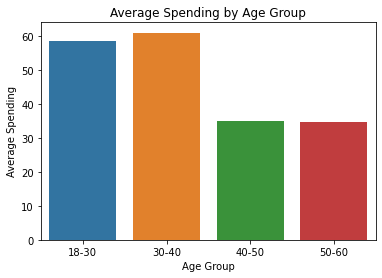

In [ ]:
# ------------------- Spending Score Analysis by Age Group -------------------
# Compute the average spending score for each age group
age_spending = df.groupby('Age Group')['Spending Score (1-100)'].mean().reset_index()
sns.barplot(x='Age Group', y='Spending Score (1-100)', data=age_spending)

# Add labels and title
plt.title('Average Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Spending')
plt.show()

In [ ]:
# ------------------- Preparing Data for K-Means Clustering -------------------
# Select features: 'Age' and 'Spending Score (1-100)'
X = df.iloc[:,[2,4]].values
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [ ]:
# ------------------- Finding Optimal Clusters using Elbow Method -------------------
from sklearn.cluster import KMeans
wcss = []  # List to store Within-Cluster Sum of Squares (WCSS)

# Run K-Means clustering for different numbers of clusters (1 to 10)
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # Append WCSS value for each cluster
    
wcss

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28165.58356662934,
 23838.248821646186,
 19483.1179104427,
 15514.193134351031,
 13006.48362885102,
 11738.020296954506,
 10173.039478114479]

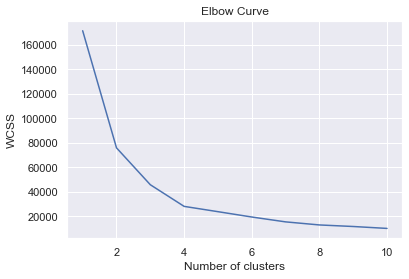

In [ ]:
# Plot Elbow Curve to determine the optimal number of clusters
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Curve")
plt.show()

In [ ]:
# ------------------- Applying K-Means Clustering -------------------
# Choosing 4 clusters based on the Elbow Method
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

# Fit K-Means and predict cluster labels
Y = kmeans.fit_predict(X)
Y

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

Text(0.5, 1.0, 'Customer Groups')

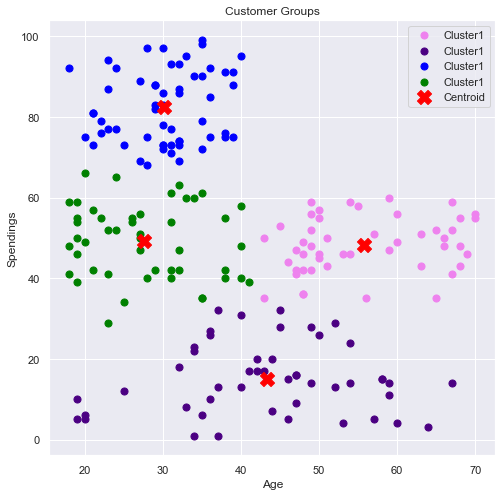

In [ ]:
# ------------------- Visualizing the Clusters -------------------
plt.figure(figsize=(8,8))

# Scatter plot for each cluster with different colors
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='violet', label='Cluster1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='indigo', label='Cluster1')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='blue',   label='Cluster1')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='green',  label='Cluster1')

# Plot centroids of clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, marker = "X", c='red', label='Centroid' )
plt.xlabel("Age")
plt.ylabel("Spendings")
plt.legend()
plt.title("Customer Groups")